# Telecom X – Parte 2: Predicción de Cancelación (Churn)

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

# 🛠️ Preparación de los Datos

## Preparción de los datos para el modelado (tratamiento, codificación, normalización).


In [1]:
import pandas as pd

datos = pd.read_csv('/content/df_normalizado.csv')

In [2]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [3]:
datos.drop('customerID', axis=1, inplace=True)

In [4]:
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [5]:
datos_clean = datos.copy()

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [7]:
# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]


In [8]:
for col  in cols_to_fix:
  datos_clean[col] = datos_clean[col].replace({'No internet service': 'No'})

In [9]:
# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

## Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [10]:
df_encoded = pd.get_dummies(datos_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.838333,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,2.836667,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,1.676667,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,2.261667,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Cuentas_Diarias                                7043 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

## Verificación de la Proporción de Cancelación (Churn)

Descripción
Editar
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:

## Balanceo de Clases (opcional)

Descripción
Editar
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


## Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
columnas_numericas = datos.select_dtypes(include=['int64', 'float64']).columns

In [15]:
# Inicializando el scaler
scaler = MinMaxScaler()

In [16]:
# Aplicando la normalización
df_encoded[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])

In [39]:
# Mostrando los datos normalizados
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [40]:
corr = df_encoded.corr()

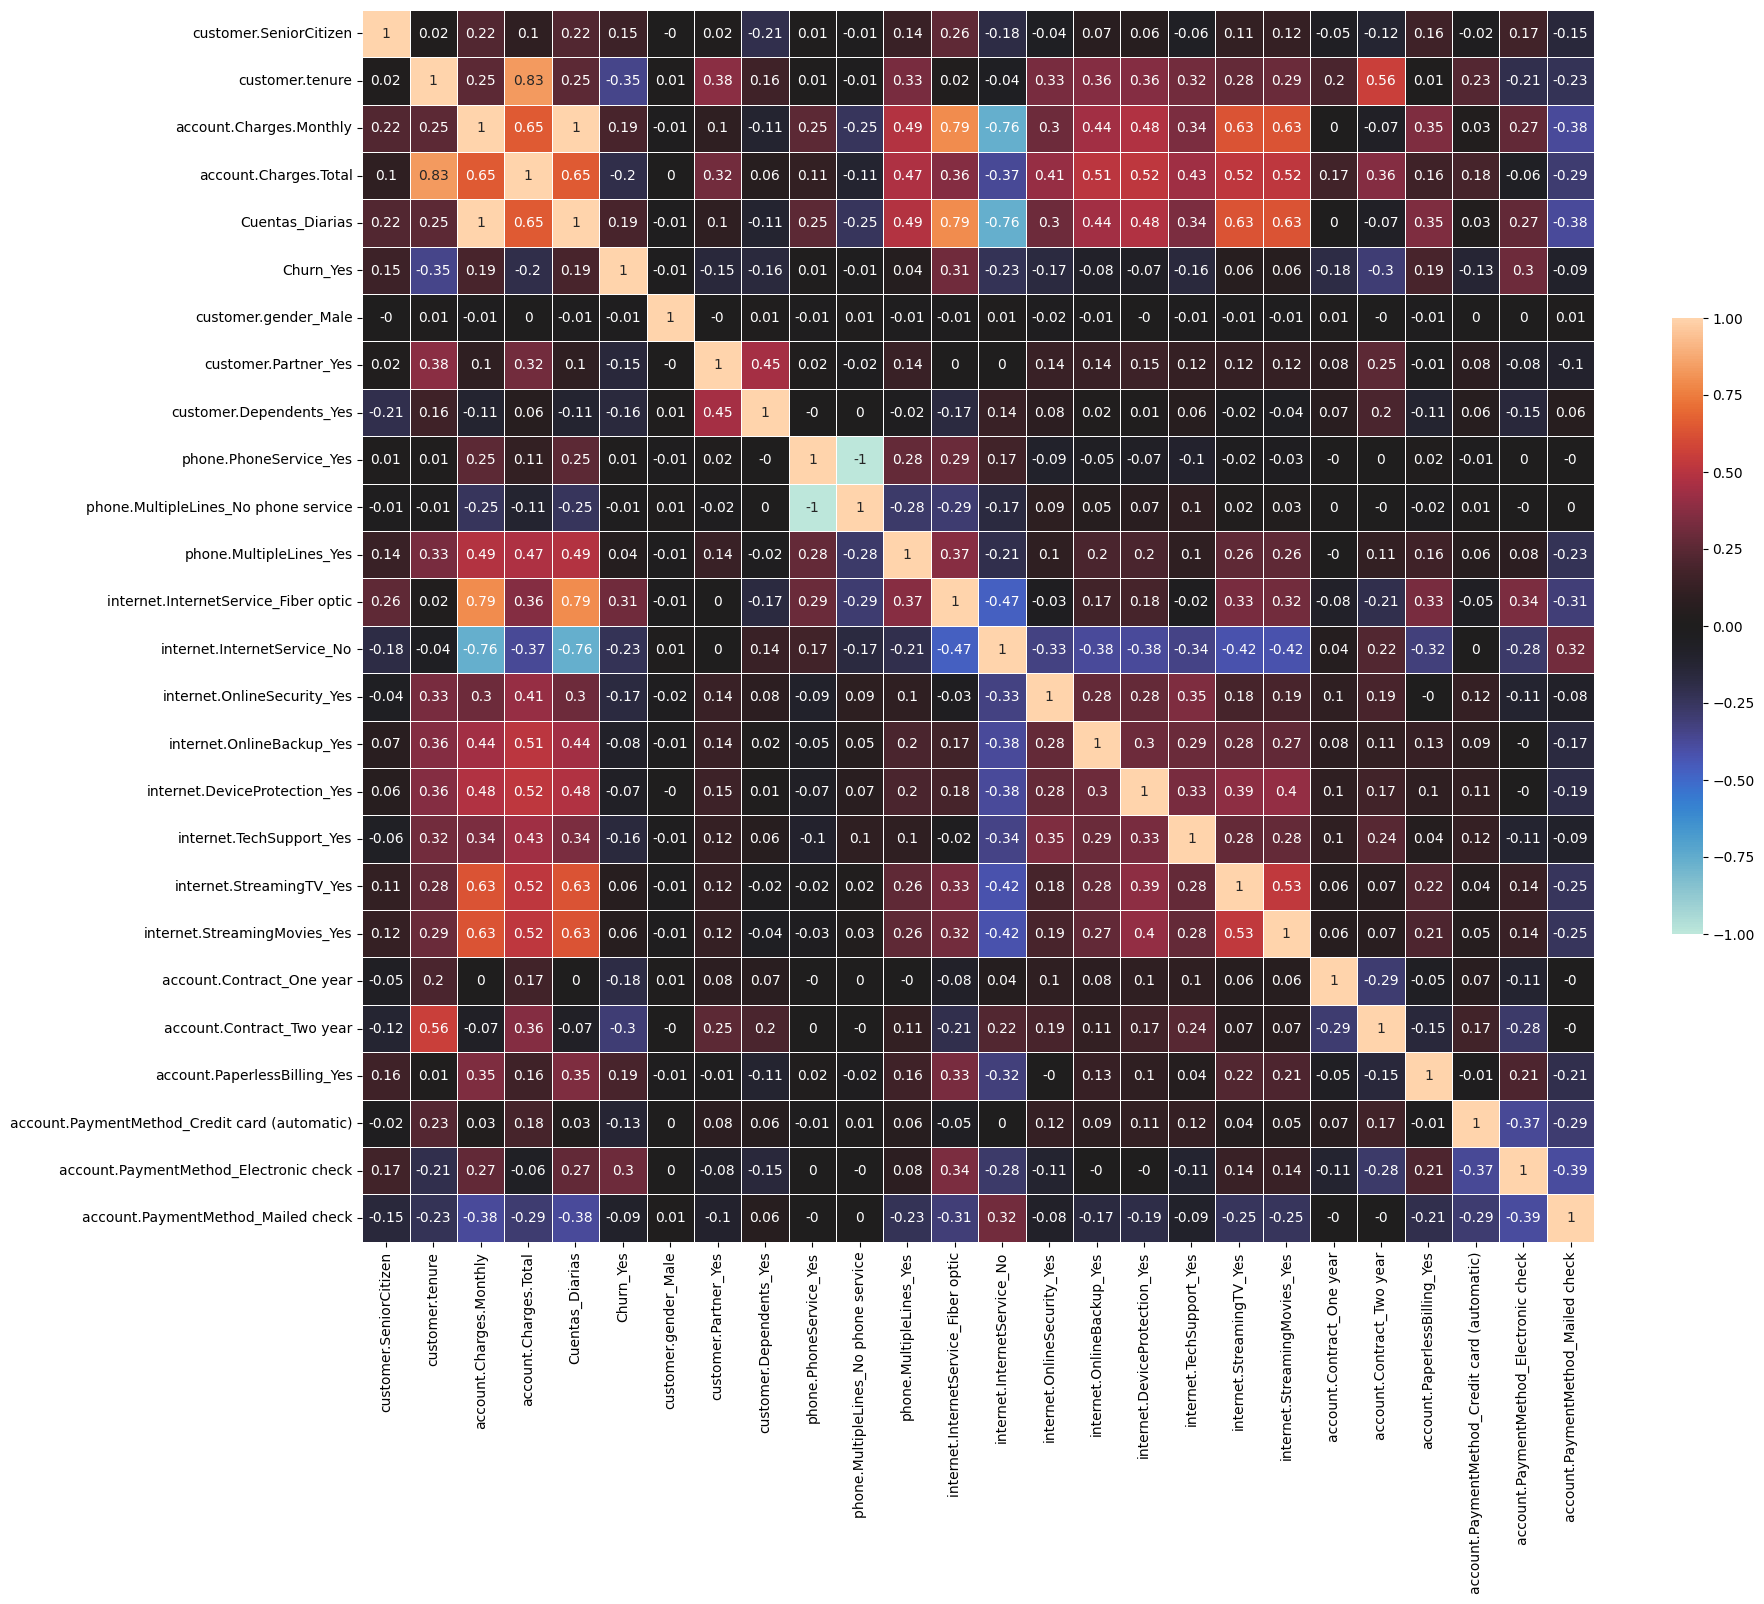

In [41]:
import numpy as np # Import the numpy library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [42]:
# Definir la variable objetivo
target_var = 'Churn_Yes'

In [45]:
# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

In [22]:
# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

In [23]:
# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

In [24]:
# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

In [25]:
# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

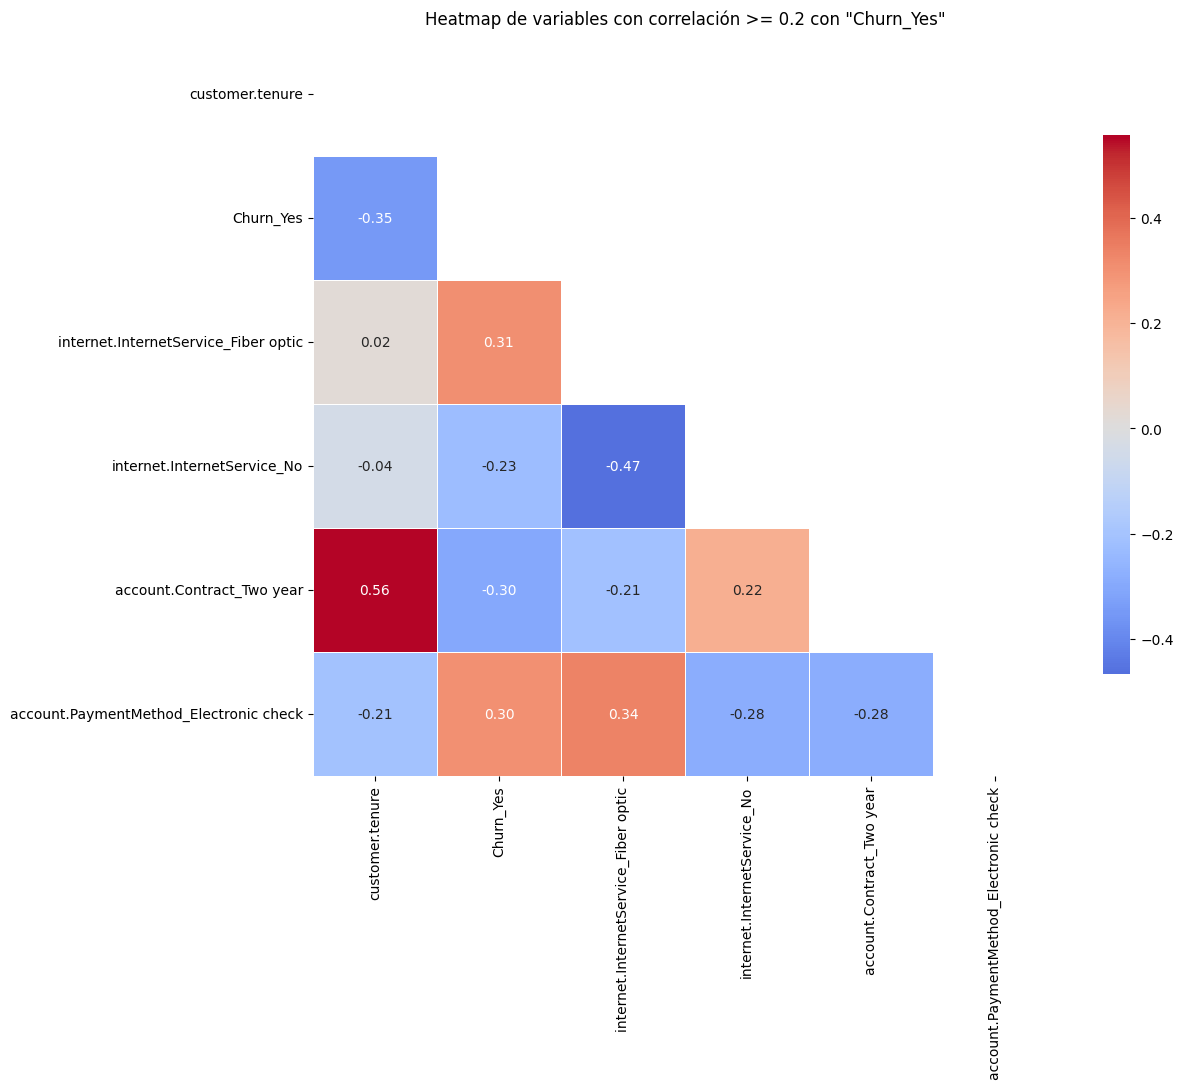

In [26]:
# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()


## Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

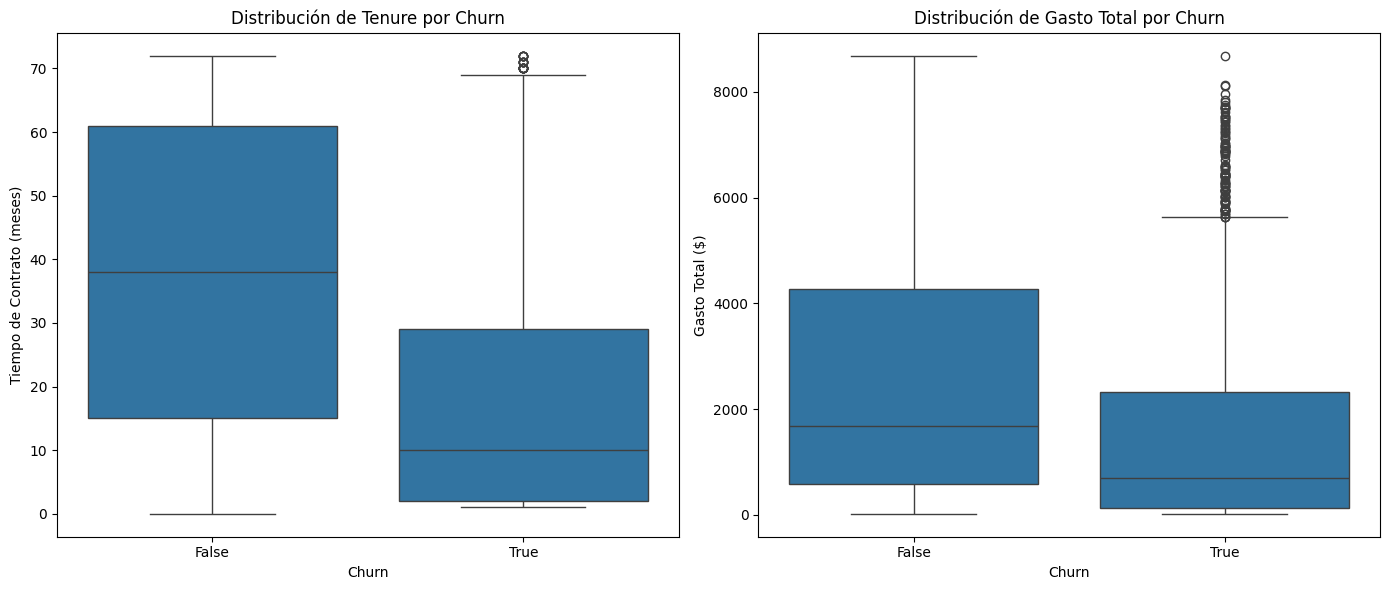

customer.tenure                                                     \
                    count       mean        std  min   25%   50%   75%   max   
Churn_Yes                                                                      
False              5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
True               1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

          account.Charges.Total                                            \
                          count         mean          std    min      25%   
Churn_Yes                                                                   
False                    5163.0  2555.344141  2329.456984  18.80  577.825   
True                     1869.0  1531.796094  1890.822994  18.85  134.500   

                                       
               50%       75%      max  
Churn_Yes                              
False      1683.60  4264.125  8672.45  
True        703.55  2331.300  8684.80

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_encoded.copy()

# Convertir columnas necesarias a numéricas por si acaso
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")
df["customer.tenure"] = pd.to_numeric(df["customer.tenure"], errors="coerce")

# Estadísticas descriptivas por Churn
desc_stats = df.groupby("Churn_Yes")[["customer.tenure", "account.Charges.Total"]].describe()

# Boxplots para visualizar la relación de cada variable con Churn
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Churn_Yes", y="customer.tenure")
plt.title("Distribución de Tenure por Churn")
plt.xlabel("Churn")
plt.ylabel("Tiempo de Contrato (meses)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Churn_Yes", y="account.Charges.Total")
plt.title("Distribución de Gasto Total por Churn")
plt.xlabel("Churn")
plt.ylabel("Gasto Total ($)")

plt.tight_layout()
plt.show()

desc_stats

Estadísticas descriptivas por "Churn"

| Variable               | Clientes que NO cancelaron | Clientes que SÍ cancelaron |
| ---------------------- | -------------------------- | -------------------------- |
| **Tiempo de contrato** | Promedio: 37.6 meses       | Promedio: 18.0 meses       |
|                        | Mediana: 38                | Mediana: 10                |
| **Gasto total**        | Promedio: \$2,555          | Promedio: \$1,532          |
|                        | Mediana: \$1,684           | Mediana: \$704             |


👉 **Conclusión**: Los clientes que cancelan tienden a tener contratos más cortos y menor gasto total acumulado.

Boxplot 1 (Tenure vs. Churn): Muestra que los clientes que no cancelan tienen mayor dispersión y mayor mediana en el tiempo de contrato.

Boxplot 2 (Gasto Total vs. Churn): Indica que los clientes que permanecen tienden a tener un gasto total más alto.

# 🤖 Modelado Predictivo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

## Separación de Datos

In [64]:
# Seleccionar variables independientes (X) y dependiente (y)
X = df[["customer.tenure", "account.Charges.Total"]].copy()
y = df["Churn_Yes"].map({False: 0, True: 1})  # Convertir a binario

# Eliminar posibles valores nulos
X = X.dropna()
y = y.loc[X.index]



 Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [65]:
# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Creación de Modelos
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [67]:
# Reimportar librerías necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [69]:
# 1️⃣ Modelo 1: Regresión Logística con normalización
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])
logistic_pipeline.fit(X_train, y_train)
y_pred_logreg = logistic_pipeline.predict(X_test)


🔁 Modelo 1: Regresión Logística (con normalización)
✅ Exactitud: 79.0%

🎯 Precisión: 64.3%

📈 Recall: 45.7%

🧮 F1-score: 53.4%

🔲 Matriz de Confusión:

             Predicho
           |  No  |  Sí
  -----------------------
   Real No | 1413 | 141
   Real Sí |  302 | 254

In [ ]:
# 2️⃣ Modelo 2: Árbol de Decisión (sin normalización)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

🌳 Modelo 2: Árbol de Decisión (sin normalización)
✅ Exactitud: 70.3%

🎯 Precisión: 44.1%

📈 Recall: 47.5%

🧮 F1-score: 45.8%

🔲 Matriz de Confusión:

## Evaluación de los Modelos
Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.



             Predicho
           |  No  |  Sí
  -----------------------
   Real No | 1220 | 334
   Real Sí |  292 | 264


In [ ]:
# Evaluación de ambos modelos
def evaluate_model(y_true, y_pred):
    return {
        "Exactitud": accuracy_score(y_true, y_pred),
        "Precisión": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "Matriz de Confusión": confusion_matrix(y_true, y_pred)
    }

results_logreg = evaluate_model(y_test, y_pred_logreg)
results_tree = evaluate_model(y_test, y_pred_tree)

results_logreg, results_tree

📊 Análisis Crítico y Comparación

| Métrica   | Regresión Logística | Árbol de Decisión |
| --------- | ------------------- | ----------------- |
| Exactitud | **79.0%**           | 70.3%             |
| Precisión | **64.3%**           | 44.1%             |
| Recall    | 45.7%               | **47.5%**         |
| F1-score  | **53.4%**           | 45.8%             |


# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

📌 **Conclusiones**

✅ Mejor desempeño general:
La regresión logística fue más precisa y tuvo mayor F1-score, lo que indica un mejor balance entre precisión y recall.

⚠️ **¿Overfitting o Underfitting?**

El árbol de decisión puede estar ligeramente sobreajustado (overfitting) a los datos de entrenamiento, ya que predice peor en general. Esto es común si no se limita la profundidad del árbol.

La regresión logística es más estable, pero aún subestima el churn (recall bajo), lo que podría indicar cierta dificultad del modelo para capturar patrones más complejos (ligero underfitting).

🛠️** Posibles mejoras:**

Para el árbol, podríamos podar el árbol o limitar su profundidad.

Para ambos modelos, incluir más variables predictoras (servicios contratados, tipo de contrato, etc.) podría mejorar el recall y balancear mejor el rendimiento.

# Conclusión

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

📋 **Informe de Análisis:**
 Factores que Influyen en la Cancelación de Clientes (Churn)

---



**🎯 Objetivo del análisis**

Investigar cómo variables específicas —tiempo de contrato y gasto total— se relacionan con la cancelación de clientes, y construir modelos predictivos que ayuden a identificar clientes con riesgo de abandonar el servicio.



**📊 Variables analizadas**


*   customer.tenure: Tiempo total (en meses) que el cliente ha permanecido con la empresa.
*  account.Charges.Total: Monto total facturado al cliente.
*   account.Charges.Monthly: Monto facturado mensualmente.









**🔎 Análisis descriptivo**


*   Clientes que cancelan tienen en promedio menos tiempo de contrato (18 meses) que quienes permanecen (38 meses).
*   También tienen un gasto total significativamente menor ($1.531 vs. $2.555).
*   Esto sugiere que los clientes con menor fidelización y facturación acumulada son más propensos a cancelar.






**🤖 Modelos predictivos utilizados**

Se entrenaron dos modelos distintos para predecir la cancelación:

| Modelo              | Requiere Normalización | Variables utilizadas               |
| ------------------- | ---------------------- | ---------------------------------- |
| Regresión Logística | ✅ Sí                   | Tenure, Gasto Total, Gasto Mensual |
| Árbol de Decisión   | ❌ No                   | Tenure, Gasto Total, Gasto Mensual |


**🧪 Resultados de los modelos**

**🔁 Regresión Logística**

Exactitud: 79.0%

Precisión: 64.3%

Recall: 45.7%

F1-score: 53.4%



**🌳 Árbol de Decisión**

Exactitud: 70.3%

Precisión: 44.1%

Recall: 47.5%

F1-score: 45.8%

**📌 Interpretación y factores clave**


1.   Tiempo de contrato (tenure):


*   El factor más importante. Clientes con menos tiempo de permanencia tienen mayor probabilidad de cancelar.
*   Clientes nuevos (menos de 12 meses) son especialmente vulnerables.


2.   Gasto total:

*   También es un fuerte predictor. Clientes que cancelan han generado menos ingresos, lo que sugiere menor compromiso o uso limitado del servicio.



3.   Gasto mensual:


*   Menor impacto directo en comparación con las otras dos variables, pero útil como apoyo para segmentar perfiles de clientes.

**💡 Recomendaciones estratégicas para la retención**


1.   🎁 Programa de Fidelización Temprana
Enfocado en los primeros 6 a 12 meses del cliente.



*   Incentivos por permanencia: descuentos, upgrades o beneficios adicionales si alcanzan ciertos meses sin cancelar.



2.   📞 Seguimiento Proactivo a Clientes Nuevos


*   Contacto personalizado durante el primer mes para resolver dudas y garantizar satisfacción.


*   Educación sobre los servicios contratados.



3.   🧮 Segmentación por Ingresos Acumulados


*   Detectar clientes con bajo gasto total y ofrecer paquetes ajustados a su uso real o necesidades para aumentar su percepción de valor.



4.   📊 Dashboards de Monitoreo de Riesgo

*   Implementar sistemas internos que alerten sobre perfiles de riesgo en función de las variables observadas.
*   Priorizar intervenciones en clientes con baja antigüedad y bajo gasto acumulado.



















In [70]:

df.to_csv('Archivo_limpio.csv', index=False)